### Jobs per GPU optimization
Quick and dirty experiment to find approximate best number of jobs per GPU for hyperparameter optimization. Set up a short test run with 32 parameter sets to run each for 5 epochs. Plan is to manually run with 1, 2, 4 and 8 jobs per GPU and time total execution rom linux command line. Will collect results by hand in dict below. This should be plenty of information to see how run time scales with the number of jobs running per GPU.

Run parameter were:
* epochs = 5
* iterations = 1
* block_sizes = [9, 13]
* GRU_unit_nums = [16, 32, 64, 128]
* learning_rates = [0.001, 0.0001, 0.00001, 0.000001]

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [2]:
total_epochs = 5 * 2 * 4 * 4    # epochs * block sizes * GRU unit nums * learning rates
total_runs = 2 * 4 * 4          # block sizes * GRU unit nums * learning rates

run_times = {
    'Jobs per GPU': [1, 2, 4, 8, 16],
    'Total execution time (sec.)': [1651.43, 967.995, 833.814, 770.405, 767.909],
    'Apparent epoch rate (epochs per min.)': [],
    'Apparent training rate (models per hr.)': []
}

for run_time in run_times['Total execution time (sec.)']:
    run_times['Apparent epoch rate (epochs per min.)'].append(total_epochs / (run_time / 60))
    run_times['Apparent training rate (models per hr.)'].append(total_runs / (run_time / (60 * 60)))

for key, val in run_times.items():
    print(f'{key}: {val}')

Jobs per GPU: [1, 2, 4, 8, 16]
Total execution time (sec.): [1651.43, 967.995, 833.814, 770.405, 767.909]
Apparent epoch rate (epochs per min.): [5.813143760256263, 9.917406598174578, 11.513359094474309, 12.46097831659971, 12.50148129530973]
Apparent training rate (models per hr.): [69.75772512307515, 119.00887917809493, 138.1603091336917, 149.53173979919652, 150.01777554371677]


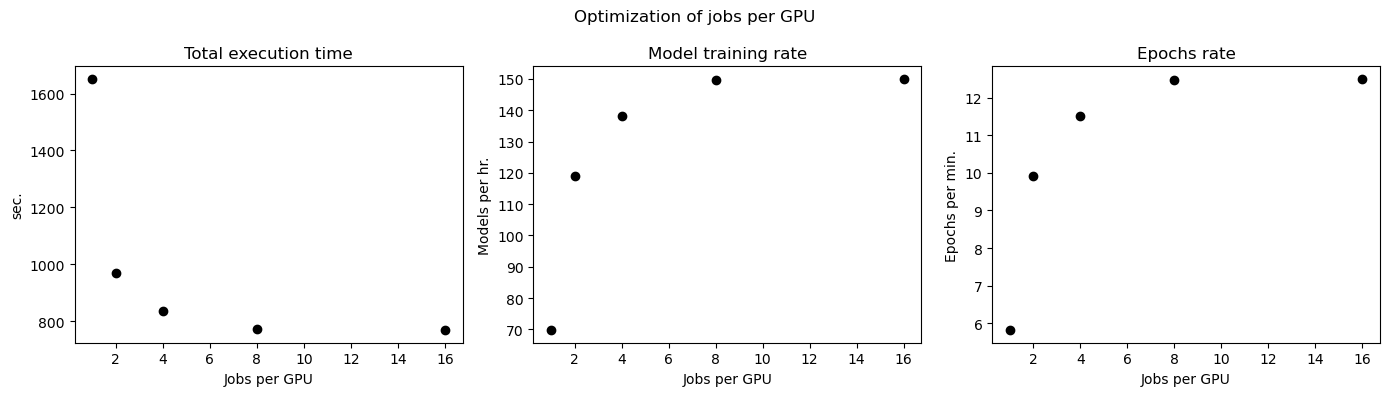

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

ax[0].scatter(run_times['Jobs per GPU'], run_times['Total execution time (sec.)'], c='black')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_title('Total execution time')
ax[0].set_xlabel('Jobs per GPU')
ax[0].set_ylabel('sec.')

ax[1].scatter(run_times['Jobs per GPU'], run_times['Apparent training rate (models per hr.)'], c='black')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set_title('Model training rate')
ax[1].set_xlabel('Jobs per GPU')
ax[1].set_ylabel('Models per hr.')

ax[2].scatter(run_times['Jobs per GPU'], run_times['Apparent epoch rate (epochs per min.)'], c='black')
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].set_title('Epochs rate')
ax[2].set_xlabel('Jobs per GPU')
ax[2].set_ylabel('Epochs per min.')

plt.suptitle('Optimization of jobs per GPU')
plt.tight_layout()

Second experiment with larger job number to see how far we can push it and/or will it ever start to slow down? Also, during the first experiment, we were using most of the CPU to bootstrap a bunch of ARIMA models. This time all machine resources are devoted to just this experiment. Total of 256 models to be trained, planning to try 1, 2, 4, 8, 16, and 32 jobs - 32 is about the maximum that our GPU memory can handle.

Run parameter were:
* epochs = 5
* iterations = 8
* block_sizes = [9, 13]
* GRU_unit_nums = [16, 32, 64, 128]
* learning_rates = [0.001, 0.0001, 0.00001, 0.000001]

In [12]:
total_epochs = 8 * 5 * 2 * 4 * 4    # iterations * epochs * block sizes * GRU unit nums * learning rates
total_runs = 8 * 2 * 4 * 4          # iterations * block sizes * GRU unit nums * learning rates

run_times = {
    'Jobs per GPU': [1,2,4,8,16,32,12],
    'Total execution time (sec.)': [6722.531,4263.664,3477.019,3182.817,3512.741,4194.955,3581.83],
    'Total execution time (min.)': [],
    'Apparent epoch rate (epochs per min.)': [],
    'Apparent training rate (models per hr.)': []
}

for run_time in run_times['Total execution time (sec.)']:
    run_times['Total execution time (min.)'].append(run_time / 60)
    run_times['Apparent epoch rate (epochs per min.)'].append(total_epochs / (run_time / 60))
    run_times['Apparent training rate (models per hr.)'].append(total_runs / (run_time / (60 * 60)))

for key, val in run_times.items():
    print(f'{key}: {val}')

Jobs per GPU: [1, 2, 4, 8, 16, 32, 12]
Total execution time (sec.): [6722.531, 4263.664, 3477.019, 3182.817, 3512.741, 4194.955, 3581.83]
Total execution time (min.): [112.04218333333333, 71.06106666666666, 57.950316666666666, 53.04695, 58.545683333333336, 69.91591666666666, 59.69716666666667]
Apparent epoch rate (epochs per min.): [11.424268627396438, 18.0126764210313, 22.087886203670443, 24.1295682409639, 21.86326859851039, 18.307705326993975, 21.441553619239325]
Apparent training rate (models per hr.): [137.09122352875724, 216.15211705237562, 265.05463444404535, 289.5548188915668, 262.3592231821247, 219.6924639239277, 257.29864343087195]


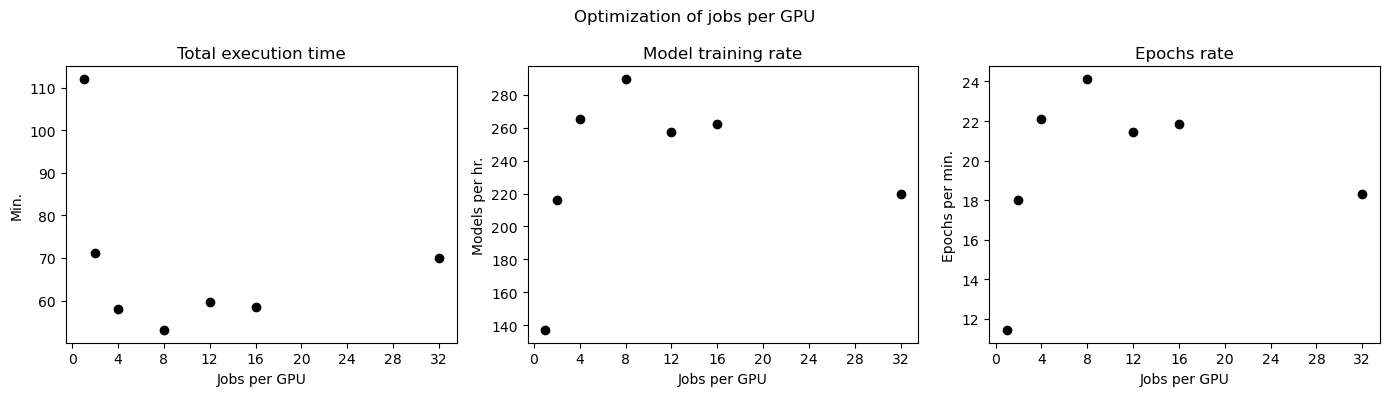

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

ax[0].scatter(run_times['Jobs per GPU'], run_times['Total execution time (min.)'], c='black')
ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_title('Total execution time')
ax[0].set_xlabel('Jobs per GPU')
ax[0].set_ylabel('Min.')

ax[1].scatter(run_times['Jobs per GPU'], run_times['Apparent training rate (models per hr.)'], c='black')
ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[1].set_title('Model training rate')
ax[1].set_xlabel('Jobs per GPU')
ax[1].set_ylabel('Models per hr.')

ax[2].scatter(run_times['Jobs per GPU'], run_times['Apparent epoch rate (epochs per min.)'], c='black')
ax[2].xaxis.set_major_locator(MaxNLocator(integer=True))
ax[2].set_title('Epochs rate')
ax[2].set_xlabel('Jobs per GPU')
ax[2].set_ylabel('Epochs per min.')

plt.suptitle('Optimization of jobs per GPU')
plt.tight_layout()

Ok, we could keep going with this, but I think we are happy 8 jobs per GPU being the sweet spot, resulting is ~2x increase in training throughput. This will allow us to train ~290 models to 5 epochs per hour or, maybe a more useful number: the training rate is 24 epochs per minute with 4 GPUs x 8 jobs per GPU. 

The result observed with 12 jobs per GPU and intuition/reasoning says that also, we should try and make the total number of models trained a multiple of the number of concurrently trained models. Also, side note: with >= 10 jobs per GPU, our 20 thread Xeon processor is pinned at 100% the whole time! But, no matter how many jobs, the individual GPU utilizations never go above 50%. My intuition was that at some point, with too many models, the IO would be a bottleneck but it looks like maybe it's the CPU.